In [89]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt



In [47]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [55]:
x = df.drop('left', axis = 'columns')
y = df['left']

In [57]:
ohe = OneHotEncoder(drop = 'first',
                   handle_unknown = 'ignore',
                   sparse_output = False)

ct = ColumnTransformer(transformers = [
    ('trf1', OneHotEncoder(categories = [['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD']]), ['Department']),
    ('trf2', OneHotEncoder(categories = [['low', 'medium', 'high']]), ['salary'])
], remainder = 'passthrough')

In [59]:
lr = LogisticRegression(random_state = 24)
kfold = StratifiedKFold(n_splits = 5, 
                        random_state = 24,
                        shuffle = True)
pipe = Pipeline([('CT', ct), ("LR", lr)])
params = {"LR__solver" : ["liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
          "LR__multi_class" : ['ovr', 'multinomial'],
          "LR__C" : np.linspace(0.0001, 10, 20)}
gcv = GridSearchCV(pipe, param_grid = params, cv = kfold)
gcv.fit(x, y)
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__C': 7.894757894736841, 'LR__multi_class': 'multinomial', 'LR__solver': 'lbfgs'}
0.7952650883627875


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.11,0.88,7,272,4,0,0,sales,medium
1,0.72,0.87,5,223,5,0,0,sales,low
2,0.37,0.52,2,159,3,0,0,sales,low
3,0.41,0.50,2,153,3,0,0,sales,low
4,0.67,0.61,3,202,2,0,0,technical,medium
5,0.76,0.62,3,150,2,1,0,technical,high
6,0.19,0.78,5,156,6,0,0,technical,medium
7,0.52,0.73,2,233,3,0,0,technical,medium
8,0.66,0.59,5,262,2,0,0,technical,medium
9,0.95,0.67,3,183,3,0,0,support,medium


In [63]:
best_lr = gcv.best_estimator_

best_lr.predict_proba(tst)

array([[0.43844038, 0.56155962],
       [0.73026521, 0.26973479],
       [0.43825709, 0.56174291],
       [0.48421204, 0.51578796],
       [0.85534338, 0.14465662],
       [0.99693381, 0.00306619],
       [0.40259544, 0.59740456],
       [0.61893488, 0.38106512],
       [0.87636934, 0.12363066],
       [0.9338198 , 0.0661802 ],
       [0.95139009, 0.04860991],
       [0.82619557, 0.17380443],
       [0.76058696, 0.23941304],
       [0.94696139, 0.05303861],
       [0.85095672, 0.14904328]])

In [65]:
best_lr.predict(tst)

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
py1 = best_lr.predict_proba(tst)[:, 1]


In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state = 24,
                                                   test_size = 0.3,
                                                   stratify = y)


In [79]:
ohe = OneHotEncoder(drop = 'first',
                   handle_unknown = 'ignore',
                   sparse_output = False)

ct = ColumnTransformer(transformers = [
    ('trf1', OneHotEncoder(categories = [['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD']]), ['Department']),
    ('trf2', OneHotEncoder(categories = [['low', 'medium', 'high']]), ['salary'])
], remainder = 'passthrough')

In [81]:
lr = LogisticRegression(random_state = 24)
kfold = StratifiedKFold(n_splits = 5, 
                        random_state = 24,
                        shuffle = True)
pipe = Pipeline([('CT', ct), ("LR", lr)])
params = {"LR__solver" : ["liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
          "LR__multi_class" : ['ovr', 'multinomial'],
          "LR__C" : np.linspace(0.0001, 10, 20)}
gcv = GridSearchCV(pipe, param_grid = params, cv = kfold)
gcv.fit(x_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('trf1',
                                                                         OneHotEncoder(categories=[['sales',
                                                                                                    'accounting',
                                                                                                    'hr',
                                                                                                    'technical',
                                                                                                    'support',
                                                                                                    'management',
                                                                                                    'IT',
                                                                                                    'product_mng',
                                                                                                    'marketing',
                                                                                                    'RandD']]),
                                                                         ['Department']),
                                                                        ('trf2',
                                                                         OneHotEncoder(categories=[[...
       2.10534211e+00, 2.63165263e+00, 3.15796316e+00, 3.68427368e+00,
       4.21058421e+00, 4.73689474e+00, 5.26320526e+00, 5.78951579e+00,
       6.31582632e+00, 6.84213684e+00, 7.36844737e+00, 7.89475789e+00,
       8.42106842e+00, 8.94737895e+00, 9.47368947e+00, 1.00000000e+01]),
                         'LR__multi_class': ['ovr', 'multinomial'],
                         'LR__solver': ['liblinear', 'lbfgs', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga']})

In [83]:
y_pred = gcv.predict(x_test)

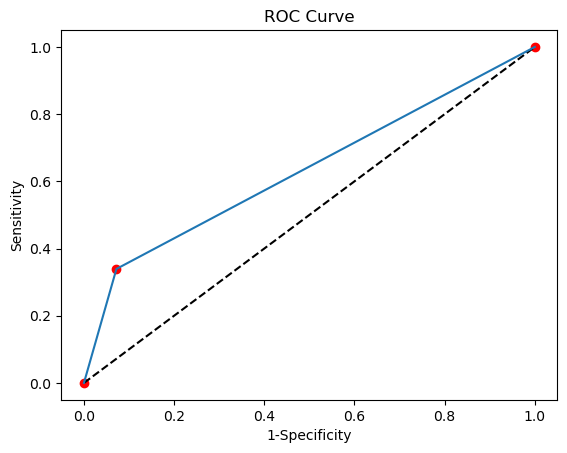

In [93]:
m1spec, sens, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(m1spec, sens)
plt.scatter(m1spec, sens, c = 'red')
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.title("ROC Curve")
plt.show()


In [7]:

new_cols = pd.DataFrame(ohe.copy().fit_transform(df[['Department']]), columns=ohe.copy().get_feature_names_out(['Department']))

new_cols

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
new_cols2 = pd.DataFrame(ohe.fit_transform(df[['salary']]), columns=ohe.get_feature_names_out(['salary']))

new_cols2

,salary_low,salary_medium
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
14990,1.0,0.0
14991,1.0,0.0
14992,1.0,0.0
14993,1.0,0.0


In [13]:
df2 = df.drop(["Department", "salary"], axis = 'columns')
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.10,0.77,6,247,4,0,1,0
3,0.92,0.85,5,259,5,0,1,0
4,0.89,1.00,5,224,5,0,1,0
...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0
14991,0.37,0.48,2,160,3,0,1,0
14992,0.37,0.53,2,143,3,0,1,0
14993,0.11,0.96,6,280,4,0,1,0


In [17]:
df2 = pd.concat([df2, new_cols], axis = 'columns')
df2 = pd.concat([df2, new_cols2], axis = 'columns')

In [19]:
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,...,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.10,0.77,6,247,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.92,0.85,5,259,5,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.89,1.00,5,224,5,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14991,0.37,0.48,2,160,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14992,0.37,0.53,2,143,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
14993,0.11,0.96,6,280,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [21]:
x = df2.drop('left', axis = 'columns')
y = df2['left']



In [25]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, 
#                                                    random_state = 24,
#                                                    test_size = 0.3, 
#                                                    stratify = df2['left'])


In [29]:
kfold = StratifiedKFold(n_splits = 5, 
                        random_state = 24,
                        shuffle = True)

lr = LogisticRegression(random_state = 24)
pipe = Pipeline([("LR", lr)])
params = {"LR__solver" : ["liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
          "LR__multi_class" : ['ovr', 'multinomial'],
          "LR__C" : np.linspace(0.0001, 10, 20)}
gcv = GridSearchCV(pipe, param_grid = params, cv = kfold)
gcv.fit(x, y)
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__C': 7.894757894736841, 'LR__multi_class': 'ovr', 'LR__solver': 'lbfgs'}
0.8026675558519507


In [31]:
tst = pd.read_csv("tst_hr.csv")
tst

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.11,0.88,7,272,4,0,0,sales,medium
1,0.72,0.87,5,223,5,0,0,sales,low
2,0.37,0.52,2,159,3,0,0,sales,low
3,0.41,0.50,2,153,3,0,0,sales,low
4,0.67,0.61,3,202,2,0,0,technical,medium
5,0.76,0.62,3,150,2,1,0,technical,high
6,0.19,0.78,5,156,6,0,0,technical,medium
7,0.52,0.73,2,233,3,0,0,technical,medium
8,0.66,0.59,5,262,2,0,0,technical,medium
9,0.95,0.67,3,183,3,0,0,support,medium


In [35]:
nc1 = pd.DataFrame(ohe.transform(tst[['Department']]), columns=tst.get_feature_names_out(['Department']))
nc1

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Department
Feature names seen at fit time, yet now missing:
- salary
